In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.optimize import curve_fit

# **<u>Searching for habitable exoplanets</u>**

Candidate number: 24182

## **<u>Introduction</u>**

The dataset used in this notebook is from the [NASA exoplanet archive](https://exoplanetarchive.ipac.caltech.edu). Planets are considered ‘habitable’ if liquid water could exist on their surface. At temperatures greater than 100°C, water boils. At temperatures below 0°C, water freezes. This means for a planet to be deemed 'habitable', it must have a surface temperature between 0°C and 100°C, which in kelvin is between 273.15K and 373.15K. In this report, estimates of the surface temperature of each planet are calculated, identifying them as either ‘habitable’ or ‘not habitable’. The distance modulus equation is used to determine how far the exoplanets are from Earth on a logarithmic scale. This value is used to obtain a luminosity, which is used to find the tempertaure of the star. With these constants a value for the surface temperature can be estimated.

## **<u>Data description and analysis</u>**

The following analysis uses the datasets: *exoplanet_data_2021* and *exoplanet_hosts_2021*. which contain original, raw data.

In [135]:
exo_data = pd.read_csv ('exoplanet_data_2021.csv')
exo_hosts = pd.read_csv ('exoplanet_hosts_2021.csv')

exoplanet_data_2021.csv: Columns (from left to right) are: planet name, host star name, planet orbital period (days), semi-major axis (AU), inclination (degrees), orbital eccentricity, planet mass (Earth masses), planet radius (Earth radii).

exoplanet_hosts_2021.csv: Columns (from left to right) are: host star name, Right Ascension (degrees), Declination (degrees), star age (109 years), star mass (solar masses), star radius (solar radii), distance from Earth (parsecs), apparent G-band magnitude (mags).

In [136]:
exo_data.head() #.head() displays first n rows of data - ensures data is of correct type before proceeding.

,pl_name,hostname,pl_orbper,pl_orbsmax,pl_orbincl,pl_orbeccen,pl_bmasse,pl_rade
0,11 UMi b,11 UMi,516.220,1.53,NaN,0.080,4684.814,12.3
1,14 And b,14 And,185.840,0.83,NaN,0.000,1525.500,12.9
2,14 Her b,14 Her,1773.400,2.93,NaN,0.370,1481.088,12.9
3,17 Sco b,17 Sco,578.380,1.45,NaN,0.060,1373.019,12.9
4,24 Boo b,24 Boo,30.351,0.19,NaN,0.042,289.225,13.9


In [137]:
exo_hosts.head() 

,hostname,ra,dec,st_age,st_mass,st_rad,sy_dist,sy_gaiamag
0,11 UMi,229.274595,71.823943,1.56,2.78,29.79,125.3210,4.56216
1,14 And,352.824150,39.235837,4.50,2.20,11.00,75.4392,4.91781
2,14 Her,242.602101,43.816362,3.90,0.90,0.93,17.9323,6.38300
3,17 Sco,243.462087,-11.837791,5.13,1.22,25.92,124.9530,4.75429
4,24 Boo,217.155524,49.844649,6.92,0.99,10.64,95.9863,5.33390


Ensuring data looks how it is expected to look before proceeding with analysis.

In [138]:
merged_data = pd.merge (left = exo_data, right = exo_hosts, on = 'hostname', how='left')
merged_data = merged_data [merged_data['pl_orbper'].notna()]

Here the data sets are being combined so a histogram can be made. Any planets that do not have a value for the planet’s orbital period have been removed - data has been 'cleaned'.

In [139]:
merged_data

,pl_name,hostname,pl_orbper,pl_orbsmax,pl_orbincl,pl_orbeccen,pl_bmasse,pl_rade,ra,dec,st_age,st_mass,st_rad,sy_dist,sy_gaiamag
0,11 UMi b,11 UMi,516.220,1.530,NaN,0.080,4684.814,12.30,229.274595,71.823943,1.56,2.78,29.79,125.32100,4.56216
1,14 And b,14 And,185.840,0.830,NaN,0.000,1525.500,12.90,352.824150,39.235837,4.50,2.20,11.00,75.43920,4.91781
2,14 Her b,14 Her,1773.400,2.930,NaN,0.370,1481.088,12.90,242.602101,43.816362,3.90,0.90,0.93,17.93230,6.38300
3,17 Sco b,17 Sco,578.380,1.450,NaN,0.060,1373.019,12.90,243.462087,-11.837791,5.13,1.22,25.92,124.95300,4.75429
4,24 Boo b,24 Boo,30.351,0.190,NaN,0.042,289.225,13.90,217.155524,49.844649,6.92,0.99,10.64,95.98630,5.33390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4039,tau Cet f,tau Cet,636.130,1.334,NaN,0.160,3.930,1.81,26.009303,-15.933799,12.12,0.78,0.83,3.60304,3.24854
4040,tau Cet g,tau Cet,20.000,0.133,NaN,0.060,1.750,1.18,26.009303,-15.933799,12.12,0.78,0.83,3.60304,3.24854
4041,tau Cet h,tau Cet,49.410,0.243,NaN,0.230,1.830,1.19,26.009303,-15.933799,12.12,0.78,0.83,3.60304,3.24854
4042,tau Gem b,tau Gem,305.500,1.170,NaN,0.031,6547.000,12.10,107.784723,30.244954,1.22,2.30,26.80,112.53700,4.03996


Information on 15 variables is available in the `merged_data` dataframe. For this investigation we are focusing on the following variables:

* pl_orbper
* pl_orbsmax
* pl_bmasse 
* st_mass
* st_rad
* sy_dist
* sy_gaiamag

### **<u>Histogram that shows the distribution of orbital periods</u>**

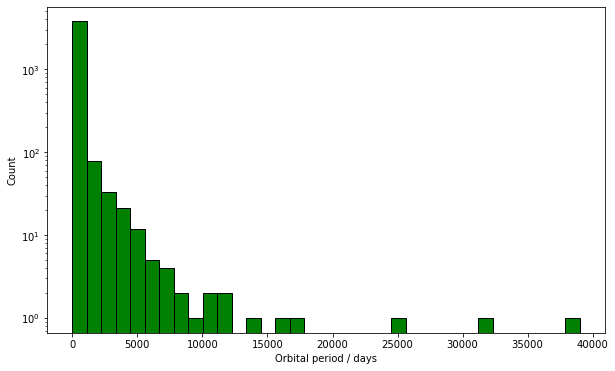

In [140]:
fig1 = plt.figure (figsize = (10,6) )
axis = fig1.add_subplot(1, 1, 1)

axis.hist (merged_data['pl_orbper'], bins = 35, color = 'green', edgecolor = 'black')

axis.set_xlabel ('Orbital period / days')
axis.set_ylabel ('Count')

axis.set_yscale ('log')

plt.show()

**Figure 1:** Distribution of orbital periods for all exoplanets in the 'merged_data' dataframe. This histogram shows the majority of exoplanets have an orbital period of less than 5000 days, with the average orbital period being ≈ 218 days.

In [141]:
merged_data['pl_orbper'].mean()

217.5957693089436

A logarithmic scale has been used on the y-axis since the data set is large. Some bands have a high 'Count', if data was on a linear scale this would make all smaller bands appear to have a negligible 'Count' - this is incorrect. Logarithmic scale makes the graph easier to read by displaying the trend more clearly.

### <u>**Calculating the semi major axis for each star using Kepler's 3rd law**</u>

Kepler’s 3rd law relates the semi-major axis and period of a planet’s orbit to the masses of the planet and the star:

$$\frac{a^3}{T^2} = \frac{G(M + m)}{4π^2} ≈ 1AU^3yr^-2$$

Where *a* is the semi-major axis (in AU), *T* is the orbital period (in years), *G* is the gravitational constant, and *M* and *m* are the mass of the star and the planet, respectively (both in solar masses).

In [142]:
G = 39.478 #AU3 yr−2 𝑀−1

In [143]:
solar_mass = 1.988*(10**30) #kg

In [144]:
earth_mass = 5.972*(10**24) #kg

Defining the gravitational constant, solar mass and Earth mass.

Function to find *a* for each planet:

In [145]:
def semi_major_axis (planet_orbital_period, star_mass, planet_mass): #Function to find *a* for each planet. 
    
    m = planet_mass * (earth_mass / solar_mass)
    M = star_mass
    T = planet_orbital_period/365.24
    
    a = np.cbrt(((T**2) * G * (M + m)) / (4 * (math.pi)**2))
    return(a)

Note that there are not ***exactly*** 365 days in 1 year on Earth.

In [146]:
merged_data['semi_major_axis'] = semi_major_axis (merged_data['pl_orbper'], merged_data['st_mass'], merged_data['pl_bmasse'])

Semi major axis values for each exoplanet:

In [147]:
merged_data[['pl_name', 'semi_major_axis']]

,pl_name,semi_major_axis
0,11 UMi b,1.773844
1,14 And b,0.829496
2,14 Her b,2.772972
3,17 Sco b,1.453328
4,24 Boo b,0.189845
...,...,...
4039,tau Cet f,1.332531
4040,tau Cet g,0.132739
4041,tau Cet h,0.242580
4042,tau Gem b,1.175156


### <u>**ratio of the semi major axis**</u>

Comparison between the calculated values and the measured (given in the data) of the semi major axis is done by calculating the ratio of the measured and predicted values. The ratio taken is measured over predicted.

In [148]:
merged_data['ratio'] = merged_data['pl_orbsmax'] / merged_data['semi_major_axis']

In [149]:
merged_data[['pl_name', 'ratio']]

,pl_name,ratio
0,11 UMi b,0.862534
1,14 And b,1.000607
2,14 Her b,1.056628
3,17 Sco b,0.997710
4,24 Boo b,1.000814
...,...,...
4039,tau Cet f,1.001103
4040,tau Cet g,1.001966
4041,tau Cet h,1.001731
4042,tau Gem b,0.995612


### <u>**Mean value of the semi major axis *a***</u>

In [150]:
merged_data['ratio'].mean()

0.9979772648799254

This value is very close to 1, showing that overall there is not much difference between the calculated values and the values in the data.

### <u>**Uncertainty for *a***</u>

Uncertainty is measured with a variance or its square root, which is a standard deviation.

Standard deviation:

In [151]:
merged_data['ratio'].std()

0.05431974166166748

Variance:

In [152]:
merged_data['ratio'].var()

0.002950634334190294

These values show how much variety there is in the data, the values are small meaning the data is precise. Uncertainty emerges because of variability. For the largest differences between the calculated semi major axis and the data-given semi major axis in the data set, the difference is still very small. There is not much error, estimates for surface temperature of each exoplanet will be accurate.

### **<u>Habitable planets?</u>**

In this section, we calculate surface temperatures for each exoplanet in the dataframe. First a value for the distance modulus must be found for each star. With this, an absolute magnitude can be found for all stars.

$$μ = 5log_{10}(d) -5$$

$$μ = m-M$$

$$M = m-5log_{10}(d) +5$$

Where *μ* is the distance modulus (units of magnitude), *d* is the distance to the star (in parsecs), *m* is the apparent magnitude of the star, and *M* is the absolute magnitude of the star.

Function for finding the absolute magnitude:

In [153]:
def absolute_magnitude_star (star_distance, apparant_magnitude_star):
    
    d = star_distance
    m = apparant_magnitude_star
    
    M = m - (5 * np.log10((d)) - 5) # M = Absolute magnitude of star 
    return(M)

In [154]:
merged_data['absolute_magnitude_star'] = absolute_magnitude_star (merged_data['sy_dist'], merged_data['sy_gaiamag'])

Absolute magnitude values for each planet:

In [155]:
merged_data[['pl_name', 'absolute_magnitude_star']]

,pl_name,absolute_magnitude_star
0,11 UMi b,-0.927959
1,14 And b,0.529825
2,14 Her b,5.114820
3,17 Sco b,-0.729443
4,24 Boo b,0.422854
...,...,...
4039,tau Cet f,5.465195
4040,tau Cet g,5.465195
4041,tau Cet h,5.465195
4042,tau Gem b,-1.216517


Absolute magnitudes can be negative, it means they have a high luminosity.

With the absolute magnitude of the stars, luminosity can be calculated.

$$L=10^{\frac{M_⊙ - M}{2.5}}$$

Where *L* is the luminosity of a star (in units of solar luminosities), *M_⊙* = 4.68 mag, the absolute magnitude of the Sun in the Gaia G-band, and *M* is the absolute magnitude of a star in the Gaia G-band.

Function for finding luminosity:

In [156]:
def luminosity (absolute_magnitude_star):
    
    M = absolute_magnitude_star
    absolute_magnitude_sun = 4.68
    
    luminosity = 10**((absolute_magnitude_sun - M) / 2.5)
    return (luminosity)

In [157]:
merged_data['luminosity'] = luminosity (merged_data['absolute_magnitude_star'])

Luminosity values for each planet:

In [158]:
merged_data [['pl_name', 'luminosity']] #MATHEMATICALLY TESTED FIRST VALUE, RETURNS CORRECT VALUES

,pl_name,luminosity
0,11 UMi b,175.058702
1,14 And b,45.716203
2,14 Her b,0.669996
3,17 Sco b,145.806665
4,24 Boo b,50.449690
...,...,...
4039,tau Cet f,0.485202
4040,tau Cet g,0.485202
4041,tau Cet h,0.485202
4042,tau Gem b,228.352971


Luminosity, temperature, and stellar radius are related by the equation:

$$\frac{L}{L_⊙}=(\frac{R}{R_⊙})^2 (\frac{T_{eff}}{T_{eff⊙}})^4$$

$$T_{eff} = T_{eff⊙}(\frac{LR_⊙^2}{R^2L_⊙})^{\frac{1}{4}}$$

Where *T_eff⊙* = 5756K, *R_⊙* = 696340 km and  *L_⊙* = 1 are the temperature, radius and luminosity of the Sun.

Function for temperature of each star:

In [159]:
def  star_temperature (radius, luminosity):
    
    #all const. values for sun
    L_s = 1 # Solar luminosity
    T_s = 5756 #K
    R_s = 1 #solar radius
    
    R = radius
    L = luminosity
    
    x = ((L * (R_s)**2) / ((L_s) * R**2))**(1/4) # x = placeholder
    T = (T_s) * x 
    return (T)

In [160]:
merged_data['star_temperature'] = star_temperature (merged_data['st_rad'], merged_data['luminosity'])

Star temperatures for each planet:

In [161]:
merged_data [['pl_name', 'star_temperature']]

,pl_name,star_temperature
0,11 UMi b,3836.025270
1,14 And b,4512.757325
2,14 Her b,5400.044129
3,17 Sco b,3928.688815
4,24 Boo b,4702.887575
...,...,...
4039,tau Cet f,5273.054753
4040,tau Cet g,5273.054753
4041,tau Cet h,5273.054753
4042,tau Gem b,4322.201951


Finally, the surface temperature of a planet can be estimated by:

$$T_p=T_{eff}(\frac{0.9R}{2a})^{\frac{1}{2}}$$

Where *T_p* is the surface temperature of the planet, *T* is the temperature of the star (in Kelvin), *R* is the radius of the star (metres) and *a* is the semi-major axis (in metres)

Function for surface temperature of each exoplanet:

In [162]:
def  surface_temperature (star_temperature, st_rad, semi_major_axis):
    
    T = star_temperature
    R = st_rad * 696340000
    a = semi_major_axis *  1.495978707 * 10**11
    
    k = T * ((0.9 * R) / (2 * a))**0.5
    return (k)

To convert au to metres, multiply by ≈ 1.5×10^11 - the distance between the sun and the Earth

In [163]:
merged_data['surface_temperature'] = surface_temperature (merged_data['star_temperature'], merged_data['st_rad'], merged_data['semi_major_axis'])

Surface temperature values for all planets in data set:

In [164]:
merged_data [['pl_name', 'surface_temperature']]

,pl_name,surface_temperature
0,11 UMi b,719.470905
1,14 And b,752.116805
2,14 Her b,143.126576
3,17 Sco b,759.342200
4,24 Boo b,1611.348504
...,...,...
4039,tau Cet f,190.465771
4040,tau Cet g,603.470678
4041,tau Cet h,446.403781
4042,tau Gem b,944.667255


### <u>**How many planets are habitable?**</u>

In [165]:
array = merged_data['surface_temperature']

habitable_bool = np.empty ((0,1), dtype = 'bool')

for i in array:
    
    if 273.15 < i < 373.15:
        habitable_bool = np.append(habitable_bool, True)
    else:
        habitable_bool = np.append(habitable_bool, False)

In [166]:
print (habitable_bool)

[False False False ... False False False]


In [167]:
habitable_count = np.count_nonzero (habitable_bool)

In [168]:
print (habitable_count)

283


283 of the planets in the data have been deemed habitable. The condition we used was if the planet has a surface temperature between 273.15K and 373.15K, it is habitable. If not, it is uninhabitable.

### <u>**Graphs**</u>

In [169]:
habitable = merged_data[(merged_data['surface_temperature'] > 273.15) & (merged_data['surface_temperature'] < 373.15)]

Table displaying information for the 'habitable' planets:

In [170]:
habitable

,pl_name,hostname,pl_orbper,pl_orbsmax,pl_orbincl,pl_orbeccen,pl_bmasse,pl_rade,ra,dec,...,st_mass,st_rad,sy_dist,sy_gaiamag,semi_major_axis,ratio,absolute_magnitude_star,luminosity,star_temperature,surface_temperature
6,24 Sex c,24 Sex,883.00,2.080,NaN,0.290,273.320,13.90,155.868487,-0.902400,...,1.54,4.90,72.06910,6.20374,2.080515,0.999753,1.914995,12.764453,4914.997424,345.215403
12,6 Lyn b,6 Lyn,934.30,2.110,NaN,0.073,638.838,13.40,97.696031,58.161175,...,1.44,5.20,54.65990,5.60686,2.113087,0.998539,1.918516,12.723121,4767.245636,342.266744
15,61 Vir d,61 Vir,123.01,0.476,NaN,0.350,22.900,5.11,199.596455,-18.315774,...,0.94,0.96,8.50332,4.54052,0.474198,1.003800,4.892577,0.822184,5594.063994,364.281739
16,7 CMa b,7 CMa,735.10,1.758,90.0,0.060,587.986,13.40,99.171276,-19.256181,...,1.34,4.87,19.81010,3.67853,1.758205,0.999883,2.194097,9.871004,4623.242125,352.152355
17,7 CMa c,7 CMa,996.00,2.153,90.0,0.080,276.512,13.90,99.171276,-19.256181,...,1.34,4.87,19.81010,3.67853,2.152338,1.000308,2.194097,9.871004,4623.242125,318.280563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,YZ Cet c,YZ Cet,3.06,0.021,NaN,0.040,0.980,1.00,18.133079,-16.996243,...,0.13,0.17,3.71207,10.42940,0.020897,1.004942,12.581319,0.000691,2263.416113,295.463581
4022,bet Pic c,bet Pic,1200.00,2.700,90.0,0.240,2860.470,12.50,86.821234,-51.066148,...,1.75,2.01,19.74420,3.82015,2.667609,1.012142,2.342952,8.606352,6953.885370,276.260432
4030,kap CrB b,kap CrB,1285.00,2.650,60.0,0.167,635.660,13.40,237.808001,35.655882,...,1.50,4.85,30.06510,4.52428,2.649087,1.000345,2.133967,10.433098,4697.353478,290.890947
4033,nu Oph c,nu Oph,3184.83,5.931,90.0,0.180,7838.323,12.00,269.756601,-9.774134,...,2.70,14.60,46.21070,3.09653,5.916279,1.002488,-0.227183,91.806429,4662.970104,335.250119


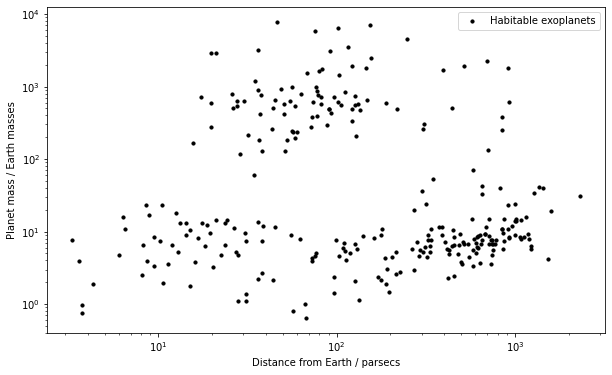

In [171]:
fig1 = plt.figure (figsize = (10,6))
axis = fig1.add_subplot(1, 1, 1)

plt.scatter (habitable['sy_dist'], habitable['pl_bmasse'], color = 'black', s = 10, alpha = 1.0, cmap='viridis', label = 'Habitable exoplanets')

axis.set_xlabel ('Distance from Earth / parsecs')
axis.set_ylabel ('Planet mass / Earth masses')

axis.set_yscale ('log')
axis.set_xscale ('log')

axis.legend()
plt.show()

**Figure 2:**  Plot of planet mass (in Earth masses) against distance from Earth (in parsecs) for all 'habitable' exoplanets.

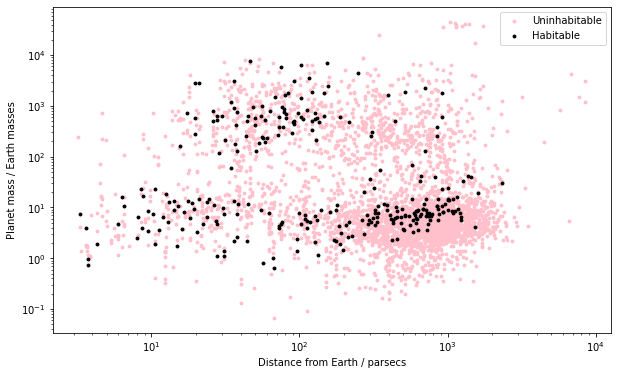

In [172]:
fig1 = plt.figure (figsize = (10,6))
axis = fig1.add_subplot(1, 1, 1)

plt.scatter (merged_data['sy_dist'], merged_data['pl_bmasse'], color = 'pink', s = 8, alpha = 1.0, cmap='viridis', label = 'Uninhabitable')
plt.scatter (habitable['sy_dist'], habitable['pl_bmasse'], color = 'black', s = 8, alpha = 1.0, cmap='viridis', label = 'Habitable')

axis.set_xlabel ('Distance from Earth / parsecs')
axis.set_ylabel ('Planet mass / Earth masses')

axis.set_yscale ('log')
axis.set_xscale ('log')

axis.legend()
plt.show()

**Figure 3:**  Plot of planet mass (in Earth masses) against distance from Earth (in parsecs) for all 'habitable' and 'non-habitable' exoplanets.

Distance from Earth is a useful data category to look at. Closer planets to Earth will be easier to get too, making those planets a more viable option to move too should we ever leave Earth. The mass of a planet is important to know as it influences the climate. Heavier planets will have a stronger greenhouse effect. Since in **Figure 3** planet mass is plotted in 'Earth masses', a value close to 1 would be the most suitable for humans as the conditions would be the most similar.

### **<u>Results and conclusions</u>**

Of the 3936 planets investigated, 283 have been deemed habitable on the basis that they lie within an accepted range of temperatures in which liquid water could exist on the surface of the planet.. In reality, more  variables are required to be looked at to determine whether a planet can be lived on. Examples of this are atmospheric pressure and the amount of carbon dioxide in the atmosphere. Therefore, the true amount of habitable exoplanets will be less than 283.

In four billion years, the increase in Earth's surface temperature will cause a runaway greenhouse effect, creating conditions more extreme than present-day Venus and heating Earth's surface enough to melt it. By that point, all life on Earth will be extinct. In order for the human race to survive, we will have to move to a new planet, this report has identified some planets we could possibly try move too in the future.